# Number-of-studies-with-the-risk-factor-in-trial-description

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Setup quick umls 

In [2]:
from quickumls import QuickUMLS
quickumls_fp = '/home/bitmman/umls/quickumls'
matcher = QuickUMLS(quickumls_fp,threshold=0.8)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bitmman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Import risk factors and their CUIs

In [3]:
dfa = pd.read_excel('./data/Risk_factor_list.xlsx')
dfa.head()

,Risk factors,CUI,Query,Concept
0,Old age,"C0231337,C1999167",Old_age,Aging
1,Males,C0086582,Males,Men
2,Chronic kidney disease,"C1561643,C4075517,C4553188,C4075526",Chronic Kidney Diseases,Chronic Kidney Diseases
3,COPD,C0024117,COPD,COPD
4,Lung cancer,"C0684249,C0242379,C1306460",Lung_cancer,Lung Cancer


In [4]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

def get_cuiList(text):
    m = matcher.match(text, best_match=True, ignore_syntax=False)
    cui_list = []
    for chunk in m:
        for dic in chunk:
            cui_list.append(dic['cui'])

    return list(set(cui_list))

### Import collected Covid-19 clinical trials

In [5]:
dfn = pd.read_csv('./data/COVID-19_trials_11272020_updated.csv')
cols = ['id','official_title','brief_summary','detailed_description','criteria']
dfn = dfn[cols]
dfn.shape

(3765, 5)

In [6]:
dfn.head(2)

,id,official_title,brief_summary,detailed_description,criteria
0,NCT04385004,"Characterization of the Clinical, Biological a...",Renal damage in patients hospitalized for ARDS...,NaN,Inclusion Criteria:## - Patients over 18 years...
1,NCT04426292,SARS-COV-2 Seroprevalence and Seroconversion A...,A novel zoonotic coronavirus was discovered in...,NaN,Inclusion Criteria:## - Any adult employee of ...


#### Merging brief_summary and detailed_description

In [7]:
dfn['summary'] = dfn['brief_summary'].astype(str) + dfn['detailed_description'].astype(str)
dfn.head(2)

,id,official_title,brief_summary,detailed_description,criteria,summary
0,NCT04385004,"Characterization of the Clinical, Biological a...",Renal damage in patients hospitalized for ARDS...,NaN,Inclusion Criteria:## - Patients over 18 years...,Renal damage in patients hospitalized for ARDS...
1,NCT04426292,SARS-COV-2 Seroprevalence and Seroconversion A...,A novel zoonotic coronavirus was discovered in...,NaN,Inclusion Criteria:## - Any adult employee of ...,A novel zoonotic coronavirus was discovered in...


#### Getting CUI list for 'summary'

In [8]:
# This process will take around 20 mins, we just need to run once and import it when we need it.
dfn['CUI_summary'] = dfn['summary'].apply(get_cuiList)
dfn.to_pickle('./data/COVID-19_trials_summary_cui.pkl')

In [9]:
dfn = pd.read_pickle('./data/COVID-19_trials_summary_cui.pkl')

In [10]:
dfa['Cui_List'] = [item.split(',') for item in dfa.CUI]
risk_factor_dic = dict(zip(dfa.Query, dfa.Cui_List))
risk_factor_dic['Old_age']

['C0231337', 'C1999167']

In [11]:
# Check risk factor names 
# list(dfa.Query)
riskfactor_name_dic = dict(zip(list(dfa.Query),[[0]*dfn.shape[0]]*len(list(dfa.Query))))
dfr = pd.DataFrame.from_dict(riskfactor_name_dic)
dfr.tail()

,Old_age,Males,Chronic Kidney Diseases,COPD,Lung_cancer,Weak_immune_1,Obesity,Serious_heart_diseases,Sickle_cell_disease,Asthma,...,Cerebrovascular_disorder,Cystic_fibrosis,Hypertension,Weak_immune_2,Pregnancy,Liver_diseases,Pulmonary_fibrosis,Smoking,Diabetes,Thalassemia
3760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# dfd1 is a dataframe with risk factors about column 'summary': 
dfd1 = pd.concat([dfn,dfr],axis=1)
dfd1.head(2)

,id,official_title,brief_summary,detailed_description,criteria,summary,CUI_summary,Old_age,Males,Chronic Kidney Diseases,...,Cerebrovascular_disorder,Cystic_fibrosis,Hypertension,Weak_immune_2,Pregnancy,Liver_diseases,Pulmonary_fibrosis,Smoking,Diabetes,Thalassemia
0,NCT04385004,"Characterization of the Clinical, Biological a...",Renal damage in patients hospitalized for ARDS...,NaN,Inclusion Criteria:## - Patients over 18 years...,Renal damage in patients hospitalized for ARDS...,"[C1273518, C0935624, C0205082, C0275524, C0005...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NCT04426292,SARS-COV-2 Seroprevalence and Seroconversion A...,A novel zoonotic coronavirus was discovered in...,NaN,Inclusion Criteria:## - Any adult employee of ...,A novel zoonotic coronavirus was discovered in...,"[C2237113, C2266627, C0886296, C0441621, C0229...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dfd1.shape

(3765, 28)

### Check risk factor occurance in summary

In [14]:
# Assigining value 1 to the risk factor column if the risk factor appears in the column 'summary'
# 0 means the corresponding risk factor doesn't appear in column 'summary' and 
# 1 means the corresponding risk factor appears in column 'summary'.
for riskfactor,cuiList in risk_factor_dic.items():    
    for i,row in dfd1.iterrows():
        if intersection(row['CUI_summary'],cuiList):
            dfd1.loc[i,riskfactor] = 1
dfd1.head(2)

,id,official_title,brief_summary,detailed_description,criteria,summary,CUI_summary,Old_age,Males,Chronic Kidney Diseases,...,Cerebrovascular_disorder,Cystic_fibrosis,Hypertension,Weak_immune_2,Pregnancy,Liver_diseases,Pulmonary_fibrosis,Smoking,Diabetes,Thalassemia
0,NCT04385004,"Characterization of the Clinical, Biological a...",Renal damage in patients hospitalized for ARDS...,NaN,Inclusion Criteria:## - Patients over 18 years...,Renal damage in patients hospitalized for ARDS...,"[C1273518, C0935624, C0205082, C0275524, C0005...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NCT04426292,SARS-COV-2 Seroprevalence and Seroconversion A...,A novel zoonotic coronavirus was discovered in...,NaN,Inclusion Criteria:## - Any adult employee of ...,A novel zoonotic coronavirus was discovered in...,"[C2237113, C2266627, C0886296, C0441621, C0229...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dfd1.shape

(3765, 28)

In [16]:
# Slicing the dataframe dfd1 to extract the risk factor part
df1 = dfd1.loc[:,'Old_age':'Thalassemia']
df1.sum(axis=0).sort_values(ascending=False)

Diabetes                    163
Hypertension                121
Weak_immune_2                90
Obesity                      81
Pregnancy                    78
Neurological_disorder        66
Cerebrovascular_disorder     51
COPD                         43
Serious_heart_diseases       42
Asthma                       33
Liver_diseases               21
Cystic_fibrosis              17
Lung_cancer                   9
Pulmonary_fibrosis            9
Weak_immune_1                 8
Smoking                       6
Old_age                       5
Sickle_cell_disease           5
Chronic Kidney Diseases       2
Thalassemia                   1
Males                         0
dtype: int64

### Plot the Number of studies with the risk factor in trial description (summary)

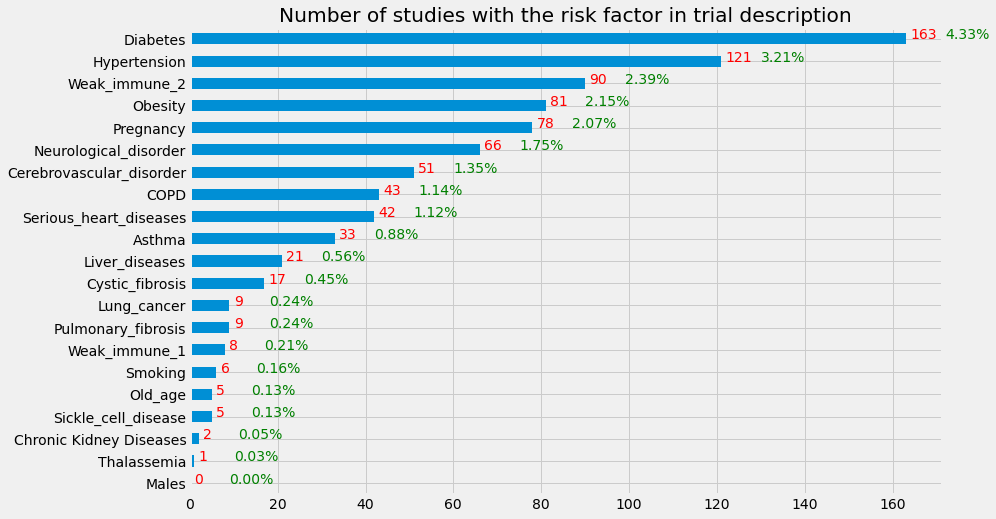

In [17]:
plt.style.use('fivethirtyeight')
fig1 = plt.figure(figsize=(12,8))
df1.sum(axis=0).sort_values(ascending=True).plot.barh()
plt.title('Number of studies with the risk factor in trial description')
for i,v in enumerate(df1.sum(axis=0).sort_values(ascending=True)):
    plt.text(v + 1, i , str(v), color = 'red')
    plt.text(v + 9, i , ("{:.2%}".format(v/3765)), color = 'green')

In [18]:
fig1.savefig("./data/risk_factor_frequency.png", dpi=300, bbox_inches = "tight")